In [123]:
import pandas as pd
import numpy as np
dfTesting = pd.read_csv("usersWith6-15Objects/validTestingResults.csv", sep=";", header=0, index_col=None)
dfTesting.head()

,id,userID,objectID,visited_objects,eventType,eventValue,position,date
0,594,2683996,5238,12,object_shown_in_list,1,recomended,2018-07-20 18:52:51
1,595,2683996,3840,12,object_shown_in_list,1,recomended,2018-07-20 18:52:51
2,596,2683996,5876,12,object_shown_in_list,1,recomended,2018-07-20 18:52:51
3,597,2683996,5367,12,object_shown_in_list,1,recomended,2018-07-20 18:52:51
4,598,2683996,98,12,object_shown_in_list,1,recomended,2018-07-20 18:52:51


In [124]:
dfIF = pd.read_csv("recent_implicit_feedback.csv", sep=";", header=0, index_col=None)
dfIF.head()

,id,userID,objectID,eventType,eventValue,lastModified
0,3706361,2705429,263,pageview,1,2018-07-16 00:04:42
1,3706364,2705430,5734,pageview,1,2018-07-16 00:07:05
2,3706366,2705431,324,pageview,1,2018-07-16 00:11:04
3,3706369,2705431,108,pageview,1,2018-07-16 00:11:48
4,3706372,2705433,303,pageview,1,2018-07-16 01:03:41


In [125]:
resOO = pd.read_csv("usersWith6-15Objects/results_open_object.csv", sep=";", header=0, index_col=0)
resOO.head()

,cnt
recVariant,
0,6
1,12
2,13
3,10
4,6


In [126]:
sum(resOO.cnt)

124

In [127]:
resSO = pd.read_csv("usersWith6-15Objects/results_shown_object.csv", sep=";", header=0, index_col=0)
resSO.head()

,cnt
recVariant,
0,3408
1,2062
2,1068
3,1464
4,1854


In [128]:
sum(resSO.cnt)

22012

In [129]:
resOO["ctr"] = resOO.cnt / resSO.cnt

In [130]:
merged = pd.merge(dfTesting, dfIF, how='inner', on=("userID", "objectID"))
merged.head()

,id_x,userID,objectID,visited_objects,eventType_x,eventValue_x,position,date,id_y,eventType_y,eventValue_y,lastModified
0,595,2683996,3840,12,object_shown_in_list,1,recomended,2018-07-20 18:52:51,3680955,pageview,2,2018-07-23 07:42:30
1,613,2683996,3840,12,object_shown_in_list,1,recomended,2018-07-20 18:54:08,3680955,pageview,2,2018-07-23 07:42:30
2,691,2683996,3840,12,object_shown_in_list,1,recomended,2018-07-20 19:04:48,3680955,pageview,2,2018-07-23 07:42:30
3,19894,2683996,3840,12,object_shown_in_list,1,recomended,2018-07-23 07:30:46,3680955,pageview,2,2018-07-23 07:42:30
4,19949,2683996,3840,12,object_shown_in_list,1,recomended,2018-07-23 07:33:10,3680955,pageview,2,2018-07-23 07:42:30


In [131]:
import datetime
merged["dateX"] = pd.to_datetime(merged.date)
merged["lastModifiedX"] = pd.to_datetime(merged.lastModified)
merged["dtDiff"] = (merged["lastModifiedX"] - merged["dateX"]).dt.seconds
merged.head()

,id_x,userID,objectID,visited_objects,eventType_x,eventValue_x,position,date,id_y,eventType_y,eventValue_y,lastModified,dateX,lastModifiedX,dtDiff
0,595,2683996,3840,12,object_shown_in_list,1,recomended,2018-07-20 18:52:51,3680955,pageview,2,2018-07-23 07:42:30,2018-07-20 18:52:51,2018-07-23 07:42:30,46179
1,613,2683996,3840,12,object_shown_in_list,1,recomended,2018-07-20 18:54:08,3680955,pageview,2,2018-07-23 07:42:30,2018-07-20 18:54:08,2018-07-23 07:42:30,46102
2,691,2683996,3840,12,object_shown_in_list,1,recomended,2018-07-20 19:04:48,3680955,pageview,2,2018-07-23 07:42:30,2018-07-20 19:04:48,2018-07-23 07:42:30,45462
3,19894,2683996,3840,12,object_shown_in_list,1,recomended,2018-07-23 07:30:46,3680955,pageview,2,2018-07-23 07:42:30,2018-07-23 07:30:46,2018-07-23 07:42:30,704
4,19949,2683996,3840,12,object_shown_in_list,1,recomended,2018-07-23 07:33:10,3680955,pageview,2,2018-07-23 07:42:30,2018-07-23 07:33:10,2018-07-23 07:42:30,560


In [132]:
mergedRestr = merged.loc[(merged.date < merged.lastModified) & (merged.dtDiff > 5) & (merged.eventType_x == "object_shown_in_list") & (merged.visited_objects > 0) & (merged.eventType_y == "pageview")]
mergedRestr.head()

,id_x,userID,objectID,visited_objects,eventType_x,eventValue_x,position,date,id_y,eventType_y,eventValue_y,lastModified,dateX,lastModifiedX,dtDiff
0,595,2683996,3840,12,object_shown_in_list,1,recomended,2018-07-20 18:52:51,3680955,pageview,2,2018-07-23 07:42:30,2018-07-20 18:52:51,2018-07-23 07:42:30,46179
1,613,2683996,3840,12,object_shown_in_list,1,recomended,2018-07-20 18:54:08,3680955,pageview,2,2018-07-23 07:42:30,2018-07-20 18:54:08,2018-07-23 07:42:30,46102
2,691,2683996,3840,12,object_shown_in_list,1,recomended,2018-07-20 19:04:48,3680955,pageview,2,2018-07-23 07:42:30,2018-07-20 19:04:48,2018-07-23 07:42:30,45462
3,19894,2683996,3840,12,object_shown_in_list,1,recomended,2018-07-23 07:30:46,3680955,pageview,2,2018-07-23 07:42:30,2018-07-23 07:30:46,2018-07-23 07:42:30,704
4,19949,2683996,3840,12,object_shown_in_list,1,recomended,2018-07-23 07:33:10,3680955,pageview,2,2018-07-23 07:42:30,2018-07-23 07:33:10,2018-07-23 07:42:30,560


In [133]:
mergedRestr.shape

(1695, 15)

In [134]:
(merged.shape, mergedRestr.shape)

((5669, 15), (1695, 15))

In [135]:
mergedRestr["recVariant"] = mergedRestr.userID % 12
mergedRestr = mergedRestr[["recVariant","date","lastModified"]]
mergedRestr.head()

C:\Users\peska\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,recVariant,date,lastModified
0,4,2018-07-20 18:52:51,2018-07-23 07:42:30
1,4,2018-07-20 18:54:08,2018-07-23 07:42:30
2,4,2018-07-20 19:04:48,2018-07-23 07:42:30
3,4,2018-07-23 07:30:46,2018-07-23 07:42:30
4,4,2018-07-23 07:33:10,2018-07-23 07:42:30


In [136]:
dfGroup = mergedRestr.groupby(by=["recVariant"])
dfSum = dfGroup.count()
dfSum

,date,lastModified
recVariant,,
0,179,179
1,204,204
2,99,99
3,83,83
4,258,258
5,62,62
6,92,92
7,141,141
8,224,224


In [137]:
resOO["vrr"] = dfSum.date/resSO.cnt

In [138]:
algVariants = [{"name":"doc2vec", "params": "128,1", "aggregation": "last", "diversity": "no", "novelty": "yes"},
            {"name":"doc2vec", "params": "128,1", "aggregation": "temporal", "diversity": "yes", "novelty": "no"},
            {"name":"doc2vec", "params": "32,5", "aggregation": "mean", "diversity": "no", "novelty": "no"},
            {"name":"doc2vec", "params": "32,5", "aggregation": "mean", "diversity": "yes", "novelty": "no"},
            {"name":"doc2vec", "params": "128,5", "aggregation": "max", "diversity": "no", "novelty": "yes"},
            {"name":"attributeCosineSim", "params": "noSameObjects", "aggregation": "temporal", "diversity": "no", "novelty": "yes"},
            {"name":"attributeCosineSim", "params": "sameAllowed", "aggregation": "mean", "diversity": "no", "novelty": "yes"},
            {"name":"attributeCosineSim", "params": "sameAllowed", "aggregation": "window10", "diversity": "no", "novelty": "no"},
            {"name":"word2vec", "params": "64,5", "aggregation": "mean", "diversity": "yes", "novelty": "no"},
            {"name":"word2vec", "params": "32,5", "aggregation": "temporal", "diversity": "no", "novelty": "yes"},
            {"name":"word2vec", "params": "128,3", "aggregation": "last", "diversity": "no", "novelty": "no"},
            {"name":"word2vec", "params": "32,3", "aggregation": "window10", "diversity": "no", "novelty": "no"}]
#resOO["algorithm"] = algVariants
#resOO

In [139]:
np.corrcoef(resOO.ctr, resOO.vrr)

array([[1.        , 0.22447059],
       [0.22447059, 1.        ]])

In [140]:
from scipy.stats import spearmanr
spearmanr(resOO.ctr, resOO.vrr)

SpearmanrResult(correlation=0.32867132867132864, pvalue=0.2969041156887641)

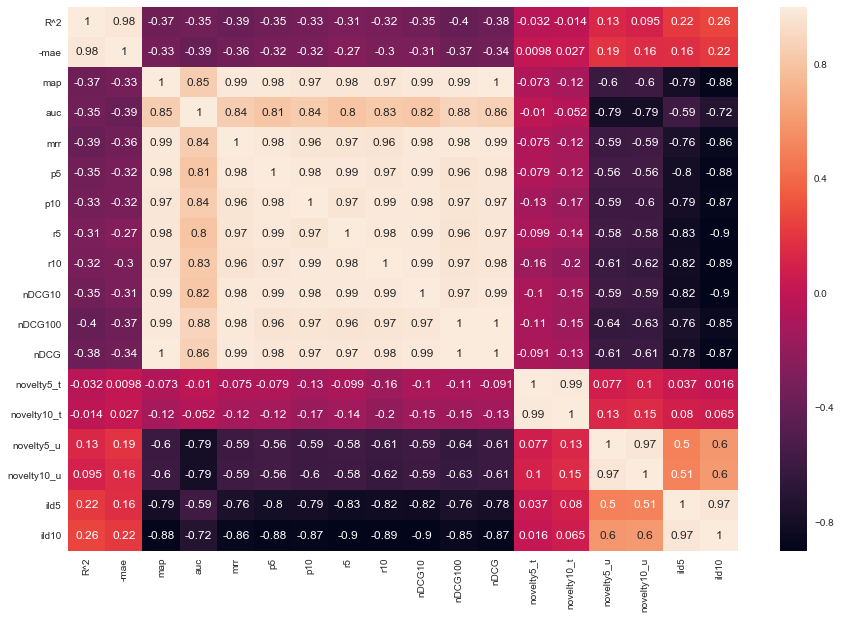

In [141]:
#get data from off-line evaluation
df = pd.read_csv("../../resultsWithNovDiv_32_0dot01Temporal.csv", sep=";", header=0, index_col=None)
df.user_novelty5 = 1-df.user_novelty5
df.user_novelty10 = 1-df.user_novelty10
df.mae = -df.mae
df.rename(columns={"r2Score":"R^2", "mae":"-mae", "aucScore":"auc", "nDCGFull":"nDCG", "novelty5":"novelty5_t", "novelty10":"novelty10_t", "user_novelty5":"novelty5_u", "user_novelty10":"novelty10_u"}, inplace=True)
del df["uid"]

%matplotlib inline
dfGroup = df.groupby(by=["alg","params","recAlg","noveltyEnhance","diversityEnhance"])
dfMean = dfGroup.mean()
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

fig, ax = plt.subplots(figsize=(15, 10))

ax = sns.heatmap(dfMean.corr(method='spearman'), annot=True)
ax.set_xticks(np.asarray(range(len(dfMean.columns)))+0.5, minor=False)
ax.set_xticklabels(dfMean.columns)

ax.set_yticks(np.asarray(range(len(dfMean.columns)))+0.5, minor=False)
ax.set_yticklabels(dfMean.columns)
df = df[["alg","params","recAlg","noveltyEnhance","diversityEnhance","-mae", "auc", "mrr", "nDCG100","novelty10_t","novelty10_u","ild10"]]

In [142]:
dfGroup = df.groupby(by=["alg","params","recAlg","noveltyEnhance","diversityEnhance"])
dfMean = dfGroup.mean()
dfMean.reset_index(inplace=True)
dfMean.head()


,alg,params,recAlg,noveltyEnhance,diversityEnhance,-mae,auc,mrr,nDCG100,novelty10_t,novelty10_u,ild10
0,attributeCosineSim,noSameObjects,last,no,no,-0.374933,0.736751,0.134829,0.191740,0.216582,0.998246,0.213208
1,attributeCosineSim,noSameObjects,last,no,yes,-0.374933,0.736751,0.135444,0.193977,0.217033,0.998246,0.240683
2,attributeCosineSim,noSameObjects,last,yes,no,-0.375671,0.738166,0.131909,0.189104,0.222839,0.998772,0.213817
3,attributeCosineSim,noSameObjects,last,yes,yes,-0.375671,0.738166,0.133143,0.191978,0.223193,0.998246,0.241725
4,attributeCosineSim,noSameObjects,max,no,no,-0.422967,0.795054,0.139913,0.214346,0.220340,0.992456,0.272226


In [143]:
selectedRes = map(lambda x: dfMean.loc[(dfMean.alg == x["name"]) & (dfMean.params == x["params"]) & (dfMean.recAlg == x["aggregation"]) & (dfMean.noveltyEnhance == x["novelty"])  & (dfMean.diversityEnhance == x["diversity"])  ], algVariants )
#selectedRes = map(lambda x: df.loc[(df.alg == x["name"]) ], algVariants )


In [144]:
lst = list(selectedRes)
lst

[        alg params recAlg noveltyEnhance diversityEnhance      -mae       auc  \
 82  doc2vec  128,1   last            yes               no -0.292326  0.617363   
 
          mrr   nDCG100  novelty10_t  novelty10_u     ild10  
 82  0.030878  0.056917     0.233531          1.0  0.799611  ,
         alg params    recAlg noveltyEnhance diversityEnhance      -mae  \
 93  doc2vec  128,1  temporal             no              yes -0.361817   
 
          auc       mrr   nDCG100  novelty10_t  novelty10_u     ild10  
 93  0.678597  0.031335  0.075085     0.220975     0.996848  0.838122  ,
          alg params recAlg noveltyEnhance diversityEnhance      -mae  \
 288  doc2vec   32,5   mean             no               no -0.455116   
 
           auc       mrr   nDCG100  novelty10_t  novelty10_u     ild10  
 288  0.554607  0.028117  0.049527     0.211395     0.997373  0.785867  ,
          alg params recAlg noveltyEnhance diversityEnhance      -mae  \
 289  doc2vec   32,5   mean             no  

In [145]:
dct = dict([(i, lst[i].iloc[0,:].to_dict()) for i in range(len(lst))])

In [146]:
dfx = pd.DataFrame.from_dict(dct, orient='index')
dfx.index.name = 'recVariant'
dfx.index.name 

'recVariant'

In [147]:
#dfx.merge(resOO, on="recVariant")
results = pd.concat([dfx, resOO], axis=1)

In [148]:
del results["cnt"]
results

,alg,params,recAlg,noveltyEnhance,diversityEnhance,-mae,auc,mrr,nDCG100,novelty10_t,novelty10_u,ild10,ctr,vrr
recVariant,,,,,,,,,,,,,,
0,doc2vec,"128,1",last,yes,no,-0.292326,0.617363,0.030878,0.056917,0.233531,1.000000,0.799611,0.001761,0.052523
1,doc2vec,"128,1",temporal,no,yes,-0.361817,0.678597,0.031335,0.075085,0.220975,0.996848,0.838122,0.005820,0.098933
2,doc2vec,"32,5",mean,no,no,-0.455116,0.554607,0.028117,0.049527,0.211395,0.997373,0.785867,0.012172,0.092697
3,doc2vec,"32,5",mean,no,yes,-0.455116,0.554607,0.025444,0.046461,0.214064,0.997723,0.859131,0.006831,0.056694
4,doc2vec,"128,5",max,yes,no,-0.213676,0.525550,0.012323,0.031365,0.228605,0.994571,0.740691,0.003236,0.139159
5,attributeCosineSim,noSameObjects,temporal,yes,no,-0.405553,0.797143,0.146160,0.215048,0.255013,0.994386,0.269825,0.001431,0.044349
6,attributeCosineSim,sameAllowed,mean,yes,no,-0.400451,0.795240,0.149409,0.213611,0.228657,0.993684,0.222901,0.006545,0.040140
7,attributeCosineSim,sameAllowed,window10,no,no,-0.389754,0.782645,0.127338,0.204664,0.217543,0.996316,0.208432,0.008953,0.097107
8,word2vec,"64,5",mean,no,yes,-0.413579,0.809344,0.102732,0.182148,0.215008,0.973415,0.683315,0.007720,0.101726


In [149]:
print(results.loc[results.noveltyEnhance == "yes"][["ctr","vrr"]].mean())
print(results.loc[results.noveltyEnhance == "no"][["ctr","vrr"]].mean())

print(results.loc[results.diversityEnhance == "yes"][["ctr","vrr"]].mean())
print(results.loc[results.diversityEnhance == "no"][["ctr","vrr"]].mean())

ctr    0.003971
vrr    0.067161
dtype: float64
ctr    0.007834
vrr    0.086423
dtype: float64
ctr    0.006790
vrr    0.085784
dtype: float64
ctr    0.006036
vrr    0.075935
dtype: float64


In [150]:
print(results.loc[results.alg == "doc2vec"][["ctr","vrr"]].mean())
print(results.loc[results.alg == "attributeCosineSim"][["ctr","vrr"]].mean())
print(results.loc[results.alg == "word2vec"][["ctr","vrr"]].mean())

ctr    0.005964
vrr    0.088001
dtype: float64
ctr    0.005643
vrr    0.060532
dtype: float64
ctr    0.006986
vrr    0.079791
dtype: float64


[Text(0.5,1,"Spearman's rho")]

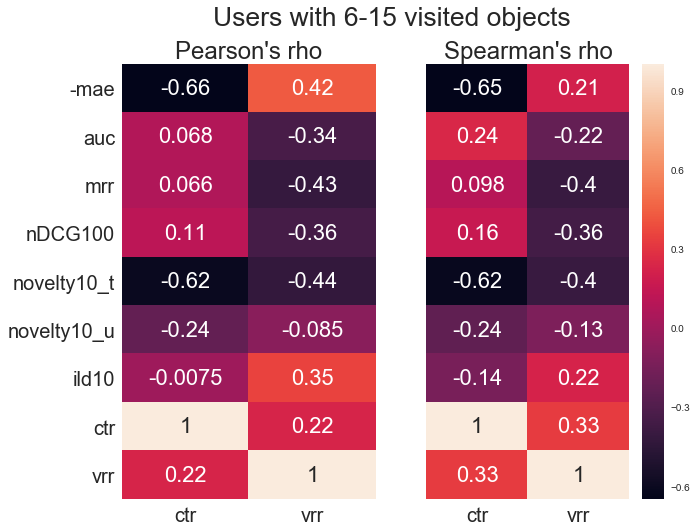

In [152]:
import matplotlib
import matplotlib.pyplot as plt
resultsX = results[['-mae',
 'auc',
 'mrr',
 'nDCG100',
 'novelty10_t',
 'novelty10_u',
 'ild10',
 'ctr',
 'vrr']]
fig, (ax1, ax2) = plt.subplots(1,2,  figsize=(10, 8))

matplotlib.rcParams.update({'font.size': 22, "axes.titlesize":24})
ax1.tick_params(axis='both', which='major', labelsize=20)
ax2.tick_params(axis='both', which='major', labelsize=20)

fig.suptitle("Users with 6-15 visited objects")
sns.heatmap(resultsX.corr()[["ctr","vrr"]], annot=True, cbar=False, ax = ax1) #method='spearman'
ax1.set_xticks(np.asarray(range(len(resultsX[["ctr","vrr"]].columns)))+0.5, minor=False)
ax1.set_xticklabels(resultsX[["ctr","vrr"]].columns)

ax1.set_yticks(np.asarray(range(len(resultsX.columns)))+0.5, minor=False)
ax1.set_yticklabels(resultsX.columns)

ax1.set(title="Pearson's rho")

sns.heatmap(resultsX.corr(method='spearman')[["ctr","vrr"]], annot=True,  yticklabels=False, ax = ax2) #method='spearman'
ax2.set_xticks(np.asarray(range(len(resultsX[["ctr","vrr"]].columns)))+0.5, minor=False)
ax2.set_xticklabels(resultsX[["ctr","vrr"]].columns)

ax2.set(title="Spearman's rho")

#ax2.set_yticks(np.asarray(range(len(resultsX.columns)))+0.5, minor=False)
#ax2.set_yticklabels(resultsX.columns)

In [153]:
results.alg[results.alg == "attributeCosineSim"] = "cos"
results.alg[results.alg == "cosine"] = "cos"
results.alg[results.alg == "word2vec"] = "w2v"
results.alg[results.alg == "doc2vec"] = "d2v"


C:\Users\peska\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\peska\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\peska\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\peska\Anac

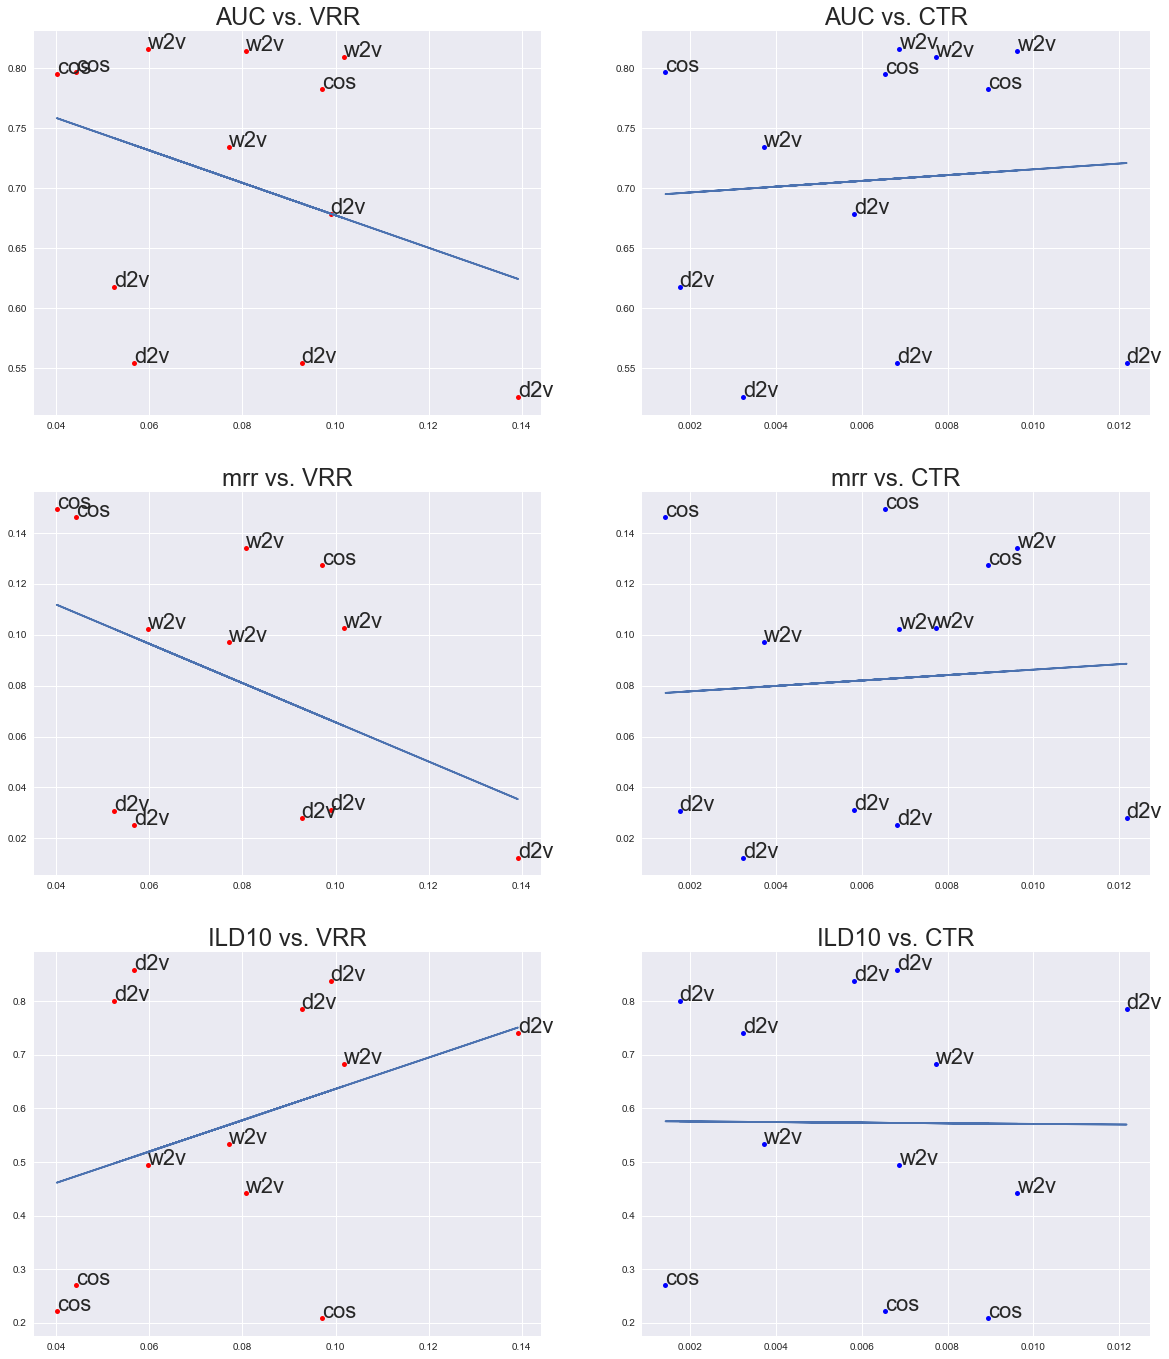

In [154]:
from matplotlib import pyplot
fig, ((ax1, ax2), (ax4, ax5), (ax6, ax7)) = plt.subplots(3,2,  figsize=(20, 24))
import numpy as np
from numpy.polynomial.polynomial import polyfit

ax1.plot(resultsX.vrr,resultsX.auc,  color='red', marker='o', markersize=5, linestyle='none')
ax1.set_title('AUC vs. VRR')

ax2.plot(resultsX.ctr,resultsX.auc,  color='blue', marker='o', markersize=5, linestyle='none')
ax2.set_title('AUC vs. CTR')

ax4.plot(resultsX.vrr, resultsX.mrr, color='red', marker='o', markersize=5, linestyle='none')
ax4.set_title('mrr vs. VRR')
ax5.plot(resultsX.ctr, resultsX.mrr, color='blue', marker='o', markersize=5, linestyle='none')
ax5.set_title('mrr vs. CTR')

ax6.plot(resultsX.vrr, resultsX.ild10, color='red', marker='o', markersize=5, linestyle='none')
ax6.set_title('ILD10 vs. VRR')
ax7.plot(resultsX.ctr, resultsX.ild10, color='blue', marker='o', markersize=5, linestyle='none')
ax7.set_title('ILD10 vs. CTR')

lst = [(ax1, resultsX.vrr, resultsX.auc), 
       (ax2, resultsX.ctr, resultsX.auc), 
       (ax4, resultsX.vrr, resultsX.mrr), 
       (ax5, resultsX.ctr, resultsX.mrr), 
       (ax6, resultsX.vrr, resultsX.ild10), 
       (ax7, resultsX.ctr, resultsX.ild10)]
for l in lst:
    b, m = polyfit(l[1], l[2], 1)
    l[0].plot(l[1], b + m * l[1], '-')
    for i, txt in enumerate(results.alg):
        l[0].annotate(txt, (l[1][i], l[2][i]))

In [155]:
res = results.index.map(str) + ":" + results["alg"]

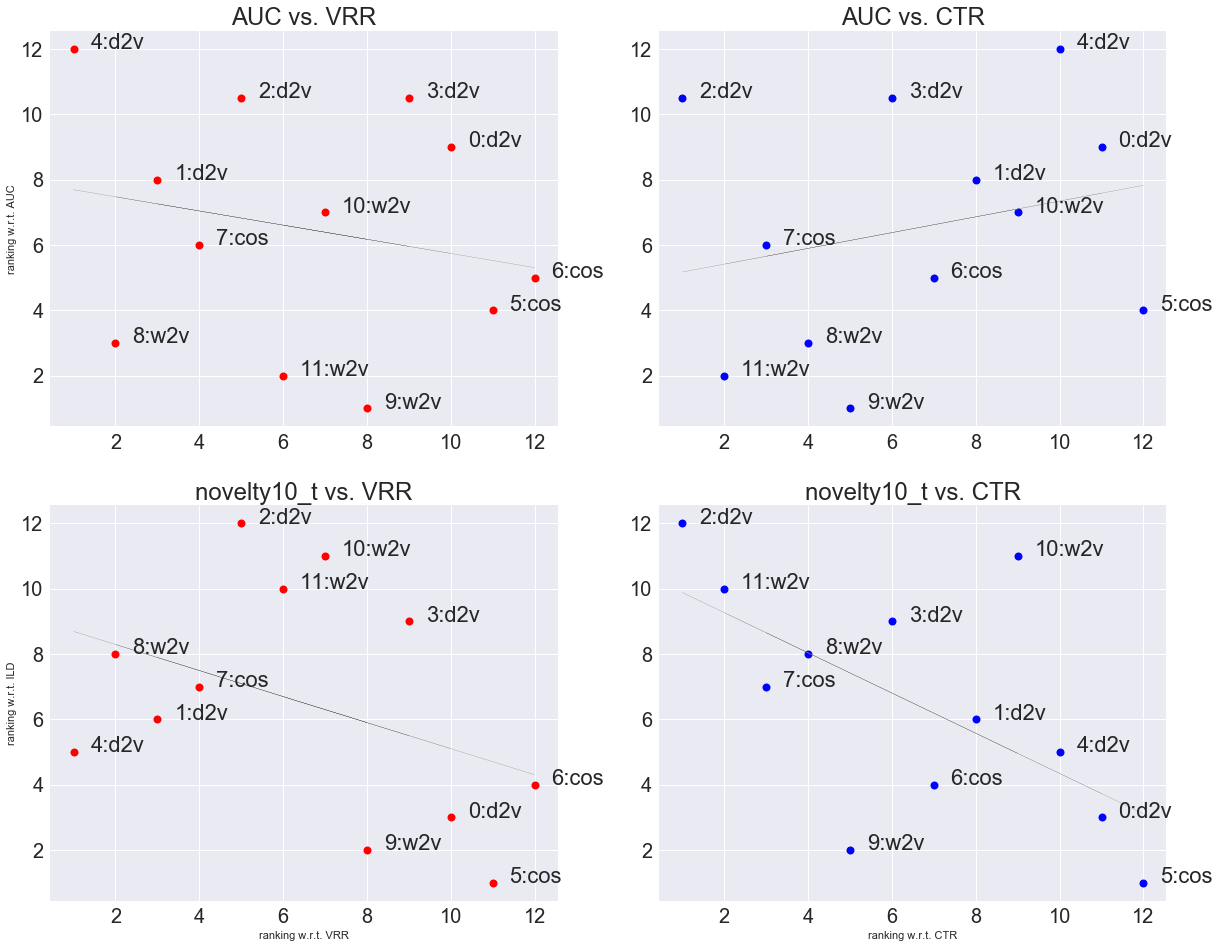

In [156]:
import scipy.stats as ss

from matplotlib import pyplot
fig, ((ax1, ax2),  (ax6, ax7)) = plt.subplots(2,2,  figsize=(20, 16))

ax1.plot(ss.rankdata(-resultsX.vrr),ss.rankdata(-resultsX.auc),  color='red', marker='o', markersize=8, linestyle='none')
ax1.set_title('AUC vs. VRR')
ax2.plot(ss.rankdata(-resultsX.ctr),ss.rankdata(-resultsX.auc),  color='blue', marker='o', markersize=8, linestyle='none')
ax2.set_title('AUC vs. CTR')


ax6.plot(ss.rankdata(-resultsX.vrr), ss.rankdata(-resultsX.novelty10_t), color='red', marker='o', markersize=8, linestyle='none')
ax6.set_title('novelty10_t vs. VRR')
ax7.plot(ss.rankdata(-resultsX.ctr), ss.rankdata(-resultsX.novelty10_t), color='blue', marker='o', markersize=8, linestyle='none')
ax7.set_title('novelty10_t vs. CTR')

lst = [(ax1, ss.rankdata(-resultsX.vrr), ss.rankdata(-resultsX.auc)), 
       (ax2, ss.rankdata(-resultsX.ctr), ss.rankdata(-resultsX.auc)), 

       (ax6, ss.rankdata(-resultsX.vrr), ss.rankdata(-resultsX.novelty10_t)), 
       (ax7, ss.rankdata(-resultsX.ctr), ss.rankdata(-resultsX.novelty10_t))]

for l in lst:
    b, m = polyfit(l[1], l[2], 1)
    l[0].plot(l[1], b + m * l[1], "--", marker="", lw=0.2, color="grey")
    
    for i, txt in enumerate(res):
        l[0].annotate(txt, (l[1][i]+0.4, l[2][i]))


ax1.set_ylabel("ranking w.r.t. AUC") 
ax6.set_ylabel("ranking w.r.t. ILD")
ax6.set_xlabel("ranking w.r.t. VRR") 
ax7.set_xlabel("ranking w.r.t. CTR")          


matplotlib.rcParams.update({'font.size': 16, "axes.titlesize":24})
ax1.tick_params(axis='both', which='major', labelsize=20)
ax2.tick_params(axis='both', which='major', labelsize=20)
ax6.tick_params(axis='both', which='major', labelsize=20)
ax7.tick_params(axis='both', which='major', labelsize=20)

#for l in lst:
 #   b, m = polyfit(l[1], l[2], 1)
  #  l[0].plot(l[1], b + m * l[1], "--", marker="", lw=0.2)
   # for i, txt in enumerate(results.index):
    #    l[0].annotate(txt, (l[1][i]+0.2, l[2][i]))
        

In [157]:
res = results.index.map(str) + ":" + results["alg"]
res

Index(['0:d2v', '1:d2v', '2:d2v', '3:d2v', '4:d2v', '5:cos', '6:cos', '7:cos',
       '8:w2v', '9:w2v', '10:w2v', '11:w2v'],
      dtype='object', name='alg')

Text(0.5,0,'ranking w.r.t. CTR')

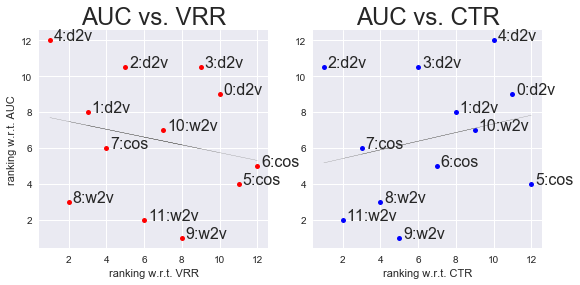

In [158]:
import scipy.stats as ss

from matplotlib import pyplot
fig, ((ax1, ax2)) = plt.subplots(1,2,  figsize=(9, 4))

ax1.plot(ss.rankdata(-resultsX.vrr),ss.rankdata(-resultsX.auc),  color='red', marker='o', markersize=5, linestyle='none')
ax1.set_title('AUC vs. VRR')
ax2.plot(ss.rankdata(-resultsX.ctr),ss.rankdata(-resultsX.auc),  color='blue', marker='o', markersize=5, linestyle='none')
ax2.set_title('AUC vs. CTR')

lst = [(ax1, ss.rankdata(-resultsX.vrr), ss.rankdata(-resultsX.auc)), 
       (ax2, ss.rankdata(-resultsX.ctr), ss.rankdata(-resultsX.auc))]
for l in lst:
    b, m = polyfit(l[1], l[2], 1)
    l[0].plot(l[1], b + m * l[1], "--", marker="", lw=0.2, color="grey")
    
    for i, txt in enumerate(res):
        l[0].annotate(txt, (l[1][i]+0.2, l[2][i]))

ax1.set_ylabel("ranking w.r.t. AUC")                
ax1.set_xlabel("ranking w.r.t. VRR") 
ax2.set_xlabel("ranking w.r.t. CTR")        

In [159]:
def calculate_vrr(dfTesting, dfIF):
    merged = pd.merge(dfTesting, dfIF, how='inner', on=("userID", "objectID"))
    merged["dateX"] = pd.to_datetime(merged.date)
    merged["lastModifiedX"] = pd.to_datetime(merged.lastModified)
    merged["dtDiff"] = (merged["lastModifiedX"] - merged["dateX"]).dt.seconds
    mergedRestr = merged.loc[(merged.date < merged.lastModified) & (merged.dtDiff > 5) & (merged.eventType_x == "object_shown_in_list") & (merged.visited_objects > 0) & (merged.eventType_y == "pageview")]
    mergedRestr["recVariant"] = mergedRestr.userID % 12
    mergedRestr = mergedRestr[["recVariant","date","lastModified"]]
    dfGroup = mergedRestr.groupby(by=["recVariant"])
    dfSum = dfGroup.count()
    return dfSum

In [160]:
dfTesting_1_2 = pd.read_csv("users_with_1-2_objects/validTestingResults.csv", sep=";", header=0, index_col=None)
dfTesting_3_5 = pd.read_csv("users_with_3-5_objects/validTestingResults.csv", sep=";", header=0, index_col=None)
dfTesting_6_15 = pd.read_csv("users_with_6-15_objects/validTestingResults.csv", sep=";", header=0, index_col=None)
dfTesting_16_ = pd.read_csv("users_with_16+_objects/validTestingResults.csv", sep=";", header=0, index_col=None)
dfTesting_ALL = pd.read_csv("allData/validTestingResults.csv", sep=";", header=0, index_col=None)

resSO_1_2 = pd.read_csv("users_with_1-2_objects/results_shown_object.csv", sep=";", header=0, index_col=0)
resSO_3_5 = pd.read_csv("users_with_3-5_objects/results_shown_object.csv", sep=";", header=0, index_col=0)
resSO_6_15 = pd.read_csv("users_with_6-15_objects/results_shown_object.csv", sep=";", header=0, index_col=0)
resSO_16_ = pd.read_csv("users_with_16+_objects/results_shown_object.csv", sep=";", header=0, index_col=0)
resSO_ALL = pd.read_csv("allData/results_shown_object.csv", sep=";", header=0, index_col=None)


resOO_1_2 = pd.read_csv("users_with_1-2_objects/results_open_object.csv", sep=";", header=0, index_col=0)
resOO_3_5 = pd.read_csv("users_with_3-5_objects/results_open_object.csv", sep=";", header=0, index_col=0)
resOO_6_15 = pd.read_csv("users_with_6-15_objects/results_open_object.csv", sep=";", header=0, index_col=0)
resOO_16_ = pd.read_csv("users_with_16+_objects/results_open_object.csv", sep=";", header=0, index_col=0)
resOO_ALL = pd.read_csv("allData/results_open_object.csv", sep=";", header=0, index_col=None)


resVO_1_2 = calculate_vrr(dfTesting_1_2, dfIF)
resVO_3_5 = calculate_vrr(dfTesting_3_5, dfIF)
resVO_6_15 = calculate_vrr(dfTesting_6_15, dfIF)
resVO_16_ = calculate_vrr(dfTesting_16_, dfIF)
resVO_ALL = calculate_vrr(dfTesting_ALL, dfIF)

stats = [
    [sum(resOO_1_2.cnt) / sum(resOO_ALL.cnt) , sum(resVO_1_2.date) / sum(resVO_ALL.date), sum(resOO_1_2.cnt) / sum(resSO_1_2.cnt) , sum(resVO_1_2.date) / sum(resSO_1_2.cnt), (sum(resOO_1_2.cnt) / sum(resSO_1_2.cnt)) / (sum(resOO_ALL.cnt) / sum(resSO_ALL.cnt))  , (sum(resVO_1_2.date) / sum(resSO_1_2.cnt)) / (sum(resVO_ALL.date) / sum(resSO_ALL.cnt))],
    [sum(resOO_3_5.cnt) / sum(resOO_ALL.cnt), sum(resVO_3_5.date) / sum(resVO_ALL.date), sum(resOO_3_5.cnt) / sum(resSO_3_5.cnt) , sum(resVO_3_5.date) / sum(resSO_3_5.cnt), (sum(resOO_3_5.cnt) / sum(resSO_3_5.cnt)) / (sum(resOO_ALL.cnt) / sum(resSO_ALL.cnt))  , (sum(resVO_3_5.date) / sum(resSO_3_5.cnt)) / (sum(resVO_ALL.date) / sum(resSO_ALL.cnt))],
    [sum(resOO_6_15.cnt) / sum(resOO_ALL.cnt), sum(resVO_6_15.date) / sum(resVO_ALL.date), sum(resOO_6_15.cnt) / sum(resSO_6_15.cnt) , sum(resVO_6_15.date) / sum(resSO_6_15.cnt), (sum(resOO_6_15.cnt) / sum(resSO_6_15.cnt)) / (sum(resOO_ALL.cnt) / sum(resSO_ALL.cnt))  , (sum(resVO_6_15.date) / sum(resSO_6_15.cnt)) / (sum(resVO_ALL.date) / sum(resSO_ALL.cnt))],
    [sum(resOO_16_.cnt) / sum(resOO_ALL.cnt), sum(resVO_16_.date) / sum(resVO_ALL.date), sum(resOO_16_.cnt) / sum(resSO_16_.cnt) , sum(resVO_16_.date) / sum(resSO_16_.cnt), (sum(resOO_16_.cnt) / sum(resSO_16_.cnt)) / (sum(resOO_ALL.cnt) / sum(resSO_ALL.cnt))  , (sum(resVO_16_.date) / sum(resSO_16_.cnt)) / (sum(resVO_ALL.date) / sum(resSO_ALL.cnt))]
]

stats

C:\Users\peska\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


[[0.6056034482758621,
  0.35297874281543656,
  0.008316931318721976,
  0.057256596569635804,
  1.167426498392288,
  0.6804398800982875],
 [0.16918103448275862,
  0.15591643098257457,
  0.006979328739719938,
  0.07597243831962658,
  0.9796706260395031,
  0.9028597562223225],
 [0.1336206896551724,
  0.15463917525773196,
  0.00563329093221879,
  0.07700345266218427,
  0.7907307221139567,
  0.9151123754428231],
 [0.0894396551724138,
  0.3364656509442569,
  0.004655336810813843,
  0.20685400190700545,
  0.6534577891308426,
  2.4582619416484297]]

In [161]:
print(sum(resOO_ALL.cnt), sum(resSO_ALL.cnt),sum(resVO_ALL.date))

928 130261 10961


In [162]:
statsDF = pd.DataFrame(stats)
statsDF.columns = ["Sum clicks","Sum visits", "CTR", "VRR", "relative CTR", "relative VRR"]

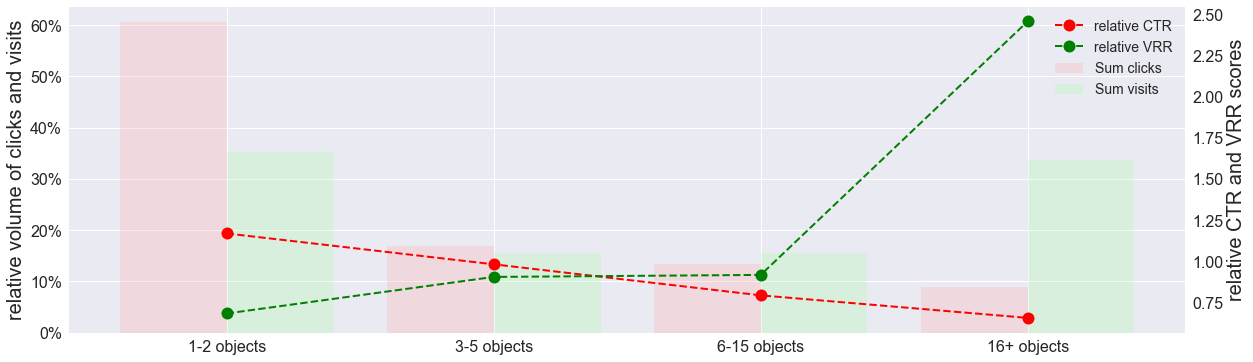

In [190]:
from matplotlib import pyplot
fig, ax1 = plt.subplots(1,1,  figsize=(20, 6))
ax2 = ax1.twinx()

#ax2.plot(statsDF["Sum clicks"], color='grey', marker='o', linestyle='dashed',linewidth=2, markersize=12)
ax1.bar(statsDF.index - 0.2, statsDF["Sum clicks"], align='center', width=0.4, color=(0.99, 0.7, 0.7, 0.3), zorder=1)
ax1.bar(statsDF.index + 0.2, statsDF["Sum visits"], align='center', width=0.4, color=(0.7, 0.99, 0.7, 0.3), zorder=2)
#ax2.plot(statsDF["Sum visits"], color='black', marker='o', linestyle='dashed',linewidth=2, markersize=12)

ax2.plot(statsDF["relative CTR"], color='red', marker='o', linestyle='dashed',linewidth=2, markersize=12, zorder=3)
ax2.plot(statsDF["relative VRR"], color='green', marker='o', linestyle='dashed',linewidth=2, markersize=12, zorder=4)
#ax.set_title('LM: predicted vs. real CTR')

ax2.yaxis.grid(False)
ax1.yaxis.grid(True)
ax2.set_ylabel('relative CTR and VRR scores', size=20)
ax1.set_ylabel('relative volume of clicks and visits', size=20)
ax1.set_xticks(range(0,4))#num of features
ax1.set_xticklabels(['1-2 objects', '3-5 objects', '6-15 objects', '16+ objects'])

#plt.legend(Gender,loc=2)
#ax1.legend(loc=2,  prop={'size': 14})
ax1.legend(["Sum clicks", "Sum visits"], bbox_to_anchor=(0.99, 0.87),  prop={'size': 14})
ax2.legend(loc=1,  prop={'size': 14})

matplotlib.rcParams.update({'font.size': 16, "axes.labelsize":20})
ax1.tick_params(axis='both', which='major', labelsize=16)
ax2.tick_params(axis='both', which='major', labelsize=16)

from matplotlib.ticker import FuncFormatter
ax1.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 


In [641]:
X = resultsX[['-mae',
 'auc',
 'mrr',
 'nDCG100',
 'novelty10_t',
 'novelty10_u',
 'ild10']]
y =  resultsX["ctr"]

In [642]:
from sklearn.linear_model import LinearRegression

lm_ctr = LinearRegression(fit_intercept=True, normalize=False)

lm_ctr.fit(X, y)

print(lm_ctr.coef_ )
print(lm_ctr.intercept_ )


[-0.00036653  0.02988812  0.06019842 -0.10728256 -0.06728621 -0.15782014
 -0.00967815]
0.17403618038932606


In [643]:
from pyearth import Earth

In [673]:
earth_ctr = Earth(max_terms=6, max_degree=2, penalty = 0.0)
earth_ctr.fit(X,y)
    
#Print the model
print(earth_ctr.trace())
print(earth_ctr.summary())

Forward Pass
----------------------------------------------------------------
iter  parent  var  knot  mse       terms  gcv    rsq    grsq    
----------------------------------------------------------------
0     -       -    -     0.000002  1      0.000  0.000  0.000   
1     0       5    -1    0.000002  2      0.000  0.147  -0.032  
2     0       6    -1    0.000002  3      0.000  0.180  -0.225  
3     1       4    -1    0.000002  4      0.000  0.239  -0.439  
4     2       2    -1    0.000002  5      0.000  0.318  -0.684  
5     1       6    -1    0.000002  6      0.000  0.375  -1.101  
6     2       1    -1    0.000001  7      0.000  0.430  -1.758  
----------------------------------------------------------------
Stopping Condition 0: Reached maximum number of terms

Pruning Pass
---------------------------------------------
iter  bf  terms  mse   gcv    rsq    grsq    
---------------------------------------------
0     -   7      0.00  0.000  0.430  -1.758  
1     6   6      0.0

C:\Users\peska\Anaconda3\lib\site-packages\pyearth\earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
C:\Users\peska\Anaconda3\lib\site-packages\pyearth\earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]


Text(0.5,1,'MARS: predicted CTR vs. VRR')

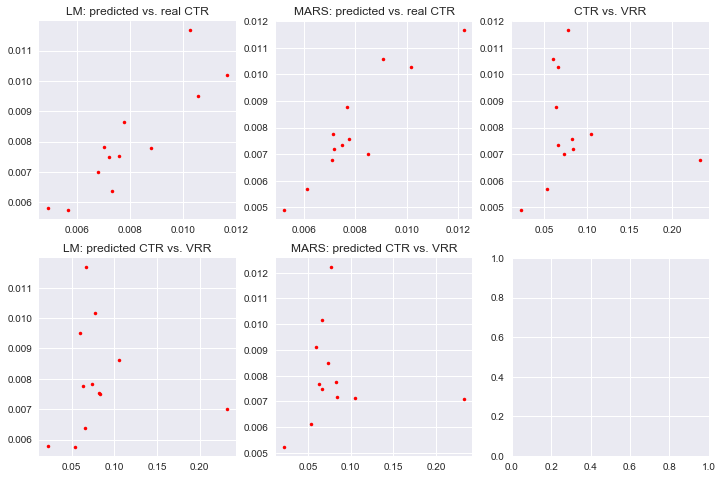

In [100]:
from matplotlib import pyplot
fig, ((ax1, ax2, ax3), (ax4, ax5, _)) = plt.subplots(2,3,  figsize=(12, 8))

y_hat = lm_ctr.predict(X)
ax1.plot(y, y_hat,'r.')
ax1.set_title('LM: predicted vs. real CTR')

ax3.plot(resultsX["vrr"], y,'r.')
ax3.set_title('CTR vs. VRR')

ax4.plot(resultsX["vrr"], y_hat,'r.')
ax4.set_title('LM: predicted CTR vs. VRR')


y_hat = earth_ctr.predict(X)
ax2.plot(y_hat,y,'r.')

ax2.set_title('MARS: predicted vs. real CTR')

ax5.plot(resultsX["vrr"], y_hat,'r.')
ax5.set_title('MARS: predicted CTR vs. VRR')



In [674]:
X = resultsX[['-mae',
 'auc',
 'mrr',
 'nDCG100',
 'novelty10_t',
 'novelty10_u',
 'ild10']]
y =  resultsX["vrr"]

In [675]:
lm_vrr = LinearRegression(fit_intercept=True, normalize=False)

lm_vrr.fit(X, y)

print(lm_vrr.coef_ )
print(lm_vrr.intercept_ )

[-0.01787541  0.19222281 -0.07136644 -0.25857636 -0.83242666 -0.27245379
 -0.03327941]
0.4360369586931325


In [698]:
model = Earth(max_terms=5, max_degree=2, penalty = 0.4)
model.fit(X,y)
    
#Print the model
print(model.trace())
print(model.summary())

Forward Pass
----------------------------------------------------------------
iter  parent  var  knot  mse       terms  gcv    rsq    grsq    
----------------------------------------------------------------
0     -       -    -     0.000307  1      0.000  0.000  0.000   
1     0       4    -1    0.000238  2      0.000  0.225  0.024   
2     1       4    -1    0.000168  3      0.000  0.454  0.107   
3     1       1    -1    0.000101  4      0.000  0.672  0.274   
4     1       0    -1    0.000075  5      0.000  0.757  0.237   
5     1       3    -1    0.000073  6      0.000  0.763  -0.149  
----------------------------------------------------------------
Stopping Condition 0: Reached maximum number of terms

Pruning Pass
---------------------------------------------
iter  bf  terms  mse   gcv    rsq    grsq    
---------------------------------------------
0     -   6      0.00  0.000  0.763  -0.149  
1     3   5      0.00  0.000  0.762  0.251   
2     4   4      0.00  0.000  0.664  0.

C:\Users\peska\Anaconda3\lib\site-packages\pyearth\earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
C:\Users\peska\Anaconda3\lib\site-packages\pyearth\earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]


Text(0.5,1,'MARS vs LM')

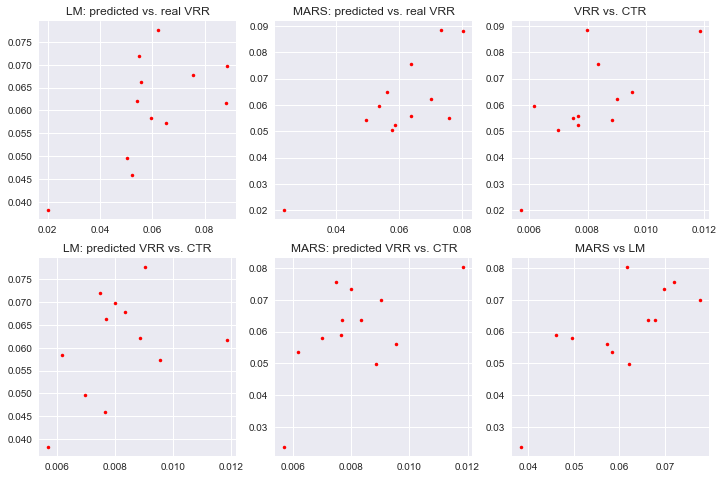

In [699]:
from matplotlib import pyplot
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3,  figsize=(12, 8))

y_hat = lm_vrr.predict(X)
ax1.plot(y, y_hat,'r.')
ax1.set_title('LM: predicted vs. real VRR')

ax3.plot(resultsX["ctr"], y,'r.')
ax3.set_title('VRR vs. CTR')

ax4.plot(resultsX["ctr"], y_hat,'r.')
ax4.set_title('LM: predicted VRR vs. CTR')


y_hat = model.predict(X)
ax2.plot(y_hat,y,'r.')

ax2.set_title('MARS: predicted vs. real VRR')

ax5.plot(resultsX["ctr"], y_hat,'r.')
ax5.set_title('MARS: predicted VRR vs. CTR')

ax6.plot(lm_vrr.predict(X), model.predict(X),'r.')
ax6.set_title('MARS vs LM')

In [700]:
Xall = dfMean[['-mae',
 'auc',
 'mrr',
 'nDCG100',
 'novelty10_t',
 'novelty10_u',
 'ild10']]


KeyError: "['-mae' 'auc' 'mrr' 'nDCG100' 'novelty10_t' 'novelty10_u' 'ild10'] not in index"

In [701]:
y_hatMars = model.predict(Xall)
y_hatLM = lm_vrr.predict(Xall)
y_hatLM_CTR = lm_ctr.predict(Xall)
y_hatMars_CTR = earth_ctr.predict(Xall)

In [702]:
len(y_hatMars)

800

In [703]:
dfMean["vrr_hat_MARS"] = y_hatMars
dfMean["vrr_hat_LM"] = y_hatLM
dfMean["ctr_hat_MARS"] = y_hatLM_CTR
dfMean["ctr_hat_LM"] = y_hatMars_CTR
dfMean.head()

,alg,params,recAlg,noveltyEnhance,diversityEnhance,vrr_hat_MARS,vrr_hat_LM,ctr_hat_MARS,ctr_hat_LM
0,attributeCosineSim,noSameObjects,last,no,no,0.073132,0.065798,0.009560,0.00811
1,attributeCosineSim,noSameObjects,last,no,yes,0.073905,0.063885,0.009061,0.00811
2,attributeCosineSim,noSameObjects,last,yes,no,0.077644,0.061601,0.009200,0.00811
3,attributeCosineSim,noSameObjects,last,yes,yes,0.078092,0.059689,0.008755,0.00811
4,attributeCosineSim,noSameObjects,max,no,no,0.079223,0.068140,0.009291,0.00811


In [704]:
dfMean = dfMean[["alg","params","recAlg","noveltyEnhance","diversityEnhance","vrr_hat_MARS","vrr_hat_LM","ctr_hat_MARS","ctr_hat_LM"]]

In [705]:
dfMean[["vrr_hat_MARS","vrr_hat_LM","ctr_hat_MARS","ctr_hat_LM"]].corr()

,vrr_hat_MARS,vrr_hat_LM,ctr_hat_MARS,ctr_hat_LM
vrr_hat_MARS,1.000000e+00,8.246808e-01,4.730328e-01,4.533720e-16
vrr_hat_LM,8.246808e-01,1.000000e+00,6.376896e-01,2.501726e-15
ctr_hat_MARS,4.730328e-01,6.376896e-01,1.000000e+00,5.741887e-15
ctr_hat_LM,4.533720e-16,2.501726e-15,5.741887e-15,1.000000e+00


In [706]:
dfMean[["vrr_hat_MARS","vrr_hat_LM","ctr_hat_MARS","ctr_hat_LM"]].corr(method="spearman")

,vrr_hat_MARS,vrr_hat_LM,ctr_hat_MARS,ctr_hat_LM
vrr_hat_MARS,1.000000,0.750983,0.460907,NaN
vrr_hat_LM,0.750983,1.000000,0.580613,NaN
ctr_hat_MARS,0.460907,0.580613,1.000000,NaN
ctr_hat_LM,NaN,NaN,NaN,NaN


In [722]:
dfGroup = dfMean.groupby(by=["alg"])
dfMean2 = dfGroup.mean()
dfMean2

,vrr_hat_MARS,vrr_hat_LM,ctr_hat_MARS,ctr_hat_LM
alg,,,,
attributeCosineSim,0.068962,0.059261,0.008447,0.00811
doc2vec,0.025796,0.048154,0.006709,0.00811
word2vec,0.058773,0.066280,0.007008,0.00811


In [723]:
dfGroup = dfMean.groupby(by=["alg","params","recAlg","noveltyEnhance","diversityEnhance"])
dfMax = dfGroup.mean()
dfMax = dfMax.groupby(by=["alg"])
dfMax.max()

,vrr_hat_MARS,vrr_hat_LM,ctr_hat_MARS,ctr_hat_LM
alg,,,,
attributeCosineSim,0.082387,0.081520,0.009663,0.00811
doc2vec,0.067037,0.072734,0.009397,0.00811
word2vec,0.081083,0.085542,0.012212,0.00811


In [724]:
dfGroup = dfMean.groupby(by=["recAlg"])
dfMean2 = dfGroup.mean()
dfMean2

,vrr_hat_MARS,vrr_hat_LM,ctr_hat_MARS,ctr_hat_LM
recAlg,,,,
last,0.064942,0.058744,0.006589,0.00811
max,0.065710,0.067864,0.008482,0.00811
mean,0.066523,0.063867,0.008525,0.00811
temporal,-0.001216,0.049737,0.007548,0.00811
temporal10,0.008902,0.049885,0.006538,0.00811
temporal3,0.027335,0.050437,0.005973,0.00811
temporal5,0.022353,0.050871,0.006184,0.00811
window10,0.064382,0.061315,0.006979,0.00811
window3,0.065513,0.060583,0.006639,0.00811


In [728]:
print(dfMean2.loc[dfMean2.index.isin( ["mean","temporal","temporal10","window10","window5","temporal5"])][["vrr_hat_MARS","vrr_hat_LM"]].mean())
print(dfMean2.loc[dfMean2.index.isin(["last","temporal3","window3"])][["vrr_hat_MARS","vrr_hat_LM"]].mean())

print(dfMean2.loc[dfMean2.index.isin( ["temporal3","temporal5","temporal10"])][["vrr_hat_MARS","vrr_hat_LM"]].mean())
print(dfMean2.loc[dfMean2.index.isin(["window3","window5","window10"])][["vrr_hat_MARS","vrr_hat_LM"]].mean())



vrr_hat_MARS    0.037670
vrr_hat_LM      0.056098
dtype: float64
vrr_hat_MARS    0.052597
vrr_hat_LM      0.056588
dtype: float64
vrr_hat_MARS    0.019530
vrr_hat_LM      0.050398
dtype: float64
vrr_hat_MARS    0.064991
vrr_hat_LM      0.060936
dtype: float64


In [729]:
dfGroup = dfMean.groupby(by=["alg","params","recAlg","noveltyEnhance","diversityEnhance"])
dfMax = dfGroup.mean()
dfMax = dfMax.groupby(by=["recAlg"])
dm = dfMax.max()
dm

,vrr_hat_MARS,vrr_hat_LM,ctr_hat_MARS,ctr_hat_LM
recAlg,,,,
last,0.078092,0.071887,0.009560,0.00811
max,0.080994,0.085542,0.010512,0.00811
mean,0.082387,0.085047,0.012212,0.00811
temporal,0.081650,0.084698,0.012140,0.00811
temporal10,0.080446,0.082093,0.009071,0.00811
temporal3,0.079355,0.078046,0.008768,0.00811
temporal5,0.079446,0.079255,0.008670,0.00811
window10,0.081083,0.079798,0.009471,0.00811
window3,0.080911,0.077115,0.009283,0.00811


In [730]:
print(dm.loc[dm.index.isin( ["mean","temporal","temporal10","temporal5","window10","window5"])][["vrr_hat_MARS","vrr_hat_LM"]].max())
print(dm.loc[dm.index.isin(["last","temporal3","window3"])][["vrr_hat_MARS","vrr_hat_LM"]].max())

print(dm.loc[dm.index.isin( ["temporal3","temporal5","temporal10"])][["vrr_hat_MARS","vrr_hat_LM"]].mean())
print(dm.loc[dm.index.isin(["window3","window5","window10"])][["vrr_hat_MARS","vrr_hat_LM"]].mean())

vrr_hat_MARS    0.082387
vrr_hat_LM      0.085047
dtype: float64
vrr_hat_MARS    0.080911
vrr_hat_LM      0.078046
dtype: float64
vrr_hat_MARS    0.079749
vrr_hat_LM      0.079798
dtype: float64
vrr_hat_MARS    0.08098
vrr_hat_LM      0.07833
dtype: float64


In [713]:
dfGroup = dfMean.groupby(by=["noveltyEnhance"])
dfMean2 = dfGroup.mean()
dfMean2

,vrr_hat_MARS,vrr_hat_LM,ctr_hat_MARS,ctr_hat_LM
noveltyEnhance,,,,
no,0.064238,0.067016,0.007624,0.00811
yes,0.025666,0.047827,0.006411,0.00811


In [714]:
dfGroup = dfMean.groupby(by=["alg","params","recAlg","noveltyEnhance","diversityEnhance"])
dfMax = dfGroup.mean()
dfMax = dfMax.groupby(by=["noveltyEnhance"])
dfMax.max()

,vrr_hat_MARS,vrr_hat_LM,ctr_hat_MARS,ctr_hat_LM
noveltyEnhance,,,,
no,0.081650,0.085542,0.012212,0.00811
yes,0.082387,0.078818,0.011810,0.00811


In [715]:
dfGroup = dfMean.groupby(by=["diversityEnhance"])
dfMean2 = dfGroup.mean()
dfMean2

,vrr_hat_MARS,vrr_hat_LM,ctr_hat_MARS,ctr_hat_LM
diversityEnhance,,,,
no,0.044127,0.058607,0.007550,0.00811
yes,0.045778,0.056236,0.006484,0.00811


In [716]:
dfGroup = dfMean.groupby(by=["alg","params","recAlg","noveltyEnhance","diversityEnhance"])
dfMax = dfGroup.mean()
dfMax = dfMax.groupby(by=["diversityEnhance"])
dfMax.max()

,vrr_hat_MARS,vrr_hat_LM,ctr_hat_MARS,ctr_hat_LM
diversityEnhance,,,,
no,0.082387,0.085542,0.012212,0.00811
yes,0.081763,0.081907,0.010398,0.00811


In [717]:
dfGroup = dfMean.groupby(by=["alg","params"])
dfMean2 = dfGroup.mean()
dfMean2

vrr_hat_MARS  vrr_hat_LM  ctr_hat_MARS  \
alg                params                                                  
attributeCosineSim noSameObjects      0.069702    0.055144      0.008374   
                   sameAllowed        0.068222    0.063378      0.008520   
doc2vec            128,1              0.015650    0.052277      0.007372   
                   128,3              0.015708    0.039855      0.005913   
                   128,5              0.014600    0.041239      0.006327   
                   32,1               0.039671    0.059598      0.007287   
                   32,3               0.035409    0.048303      0.006779   
                   32,5               0.036045    0.049082      0.006520   
                   64,1               0.024209    0.052735      0.007099   
                   64,3               0.026107    0.044643      0.006530   
                   64,5               0.024764    0.045653      0.006555   
word2vec           128,1              0.041995    0.064717      0.007118   
                   128,3              0.049025    0.064333      0.006874   
                   128,5              0.052467    0.061350      0.006598   
                   32,1               0.067238    0.067063      0.006486   
                   32,3               0.068960    0.065780      0.006840   
                   32,5               0.069401    0.068677      0.006923   
                   64,1               0.055662    0.069252      0.007396   
                   64,3               0.062685    0.066753      0.007012   
                   64,5               0.061526    0.068592      0.007826   

                                  ctr_hat_LM  
alg                params                     
attributeCosineSim noSameObjects     0.00811  
                   sameAllowed       0.00811  
doc2vec            128,1             0.00811  
                   128,3             0.00811  
                   128,5             0.00811  
                   32,1              0.00811  
                   32,3              0.00811  
                   32,5              0.00811  
                   64,1              0.00811  
                   64,3              0.00811  
                   64,5              0.00811  
word2vec           128,1             0.00811  
                   128,3             0.00811  
                   128,5             0.00811  
                   32,1              0.00811  
                   32,3              0.00811  
                   32,5              0.00811  
                   64,1              0.00811  
                   64,3              0.00811  
                   64,5              0.00811

In [718]:
dfGroup = dfMean.groupby(by=["alg","params","recAlg","noveltyEnhance","diversityEnhance"])
dfMax = dfGroup.mean()
dfMax = dfMax.groupby(by=["alg","params"])
dfMax.max()

vrr_hat_MARS  vrr_hat_LM  ctr_hat_MARS  \
alg                params                                                  
attributeCosineSim noSameObjects      0.082387    0.068140      0.009560   
                   sameAllowed        0.080344    0.081520      0.009663   
doc2vec            128,1              0.064467    0.069996      0.009388   
                   128,3              0.060799    0.058761      0.008417   
                   128,5              0.060183    0.061128      0.008591   
                   32,1               0.067037    0.072734      0.009397   
                   32,3               0.061640    0.063136      0.009181   
                   32,5               0.061699    0.062305      0.008670   
                   64,1               0.065883    0.068988      0.009127   
                   64,3               0.060333    0.061621      0.008518   
                   64,5               0.060562    0.061307      0.008776   
word2vec           128,1              0.076964    0.081244      0.010736   
                   128,3              0.077964    0.080226      0.010478   
                   128,5              0.078978    0.079069      0.009742   
                   32,1               0.080176    0.083110      0.009382   
                   32,3               0.081083    0.081869      0.010011   
                   32,5               0.078918    0.082509      0.010179   
                   64,1               0.077744    0.085542      0.011256   
                   64,3               0.079828    0.083413      0.010528   
                   64,5               0.078291    0.082953      0.012212   

                                  ctr_hat_LM  
alg                params                     
attributeCosineSim noSameObjects     0.00811  
                   sameAllowed       0.00811  
doc2vec            128,1             0.00811  
                   128,3             0.00811  
                   128,5             0.00811  
                   32,1              0.00811  
                   32,3              0.00811  
                   32,5              0.00811  
                   64,1              0.00811  
                   64,3              0.00811  
                   64,5              0.00811  
word2vec           128,1             0.00811  
                   128,3             0.00811  
                   128,5             0.00811  
                   32,1              0.00811  
                   32,3              0.00811  
                   32,5              0.00811  
                   64,1              0.00811  
                   64,3              0.00811  
                   64,5              0.00811

In [719]:
dfMean.sort_values(by="vrr_hat_MARS", ascending=False, inplace=True)
dfMean.head(50)

,alg,params,recAlg,noveltyEnhance,diversityEnhance,vrr_hat_MARS,vrr_hat_LM,ctr_hat_MARS,ctr_hat_LM
10,attributeCosineSim,noSameObjects,mean,yes,no,0.082387,0.054469,0.009061,0.00811
11,attributeCosineSim,noSameObjects,mean,yes,yes,0.081763,0.050574,0.008720,0.00811
13,attributeCosineSim,noSameObjects,temporal,no,yes,0.081650,0.057877,0.008974,0.00811
9,attributeCosineSim,noSameObjects,mean,no,yes,0.081431,0.058535,0.009159,0.00811
630,word2vec,"32,3",window10,yes,no,0.081083,0.064559,0.007141,0.00811
12,attributeCosineSim,noSameObjects,temporal,no,no,0.080998,0.061199,0.009281,0.00811
7,attributeCosineSim,noSameObjects,max,yes,yes,0.080994,0.054770,0.007234,0.00811
38,attributeCosineSim,noSameObjects,window5,yes,no,0.080946,0.055522,0.008430,0.00811
34,attributeCosineSim,noSameObjects,window3,yes,no,0.080911,0.057355,0.008419,0.00811
30,attributeCosineSim,noSameObjects,window10,yes,no,0.080832,0.055186,0.008637,0.00811


In [720]:
dfMean.sort_values(by="vrr_hat_LM", ascending=False, inplace=True)
dfMean.head(50)

,alg,params,recAlg,noveltyEnhance,diversityEnhance,vrr_hat_MARS,vrr_hat_LM,ctr_hat_MARS,ctr_hat_LM
684,word2vec,"64,1",max,no,no,0.066452,0.085542,0.010336,0.00811
688,word2vec,"64,1",mean,no,no,0.070332,0.085047,0.011256,0.00811
692,word2vec,"64,1",temporal,no,no,0.070306,0.084698,0.010910,0.00811
724,word2vec,"64,3",max,no,no,0.068902,0.083413,0.009983,0.00811
564,word2vec,"32,1",max,no,no,0.069877,0.083110,0.008948,0.00811
764,word2vec,"64,5",max,no,no,0.068305,0.082953,0.010167,0.00811
644,word2vec,"32,5",max,no,no,0.069844,0.082509,0.009127,0.00811
696,word2vec,"64,1",temporal10,no,no,0.068316,0.082093,0.008563,0.00811
689,word2vec,"64,1",mean,no,yes,0.067597,0.081907,0.009541,0.00811
604,word2vec,"32,3",max,no,no,0.070260,0.081869,0.008675,0.00811
